In [ ]:
#!pip3 install -U imageio
!pip install --upgrade pip
!pip install -U imutils

In [3]:
#from scipy import misc
import glob
#import imageio

import numpy as np
import matplotlib.pyplot as plt

import imutils
import cv2
%matplotlib inline




In [25]:
img_arr_img = []
img_arr_ref = []

for image_path in glob.glob("/floyd/input/heart_challenge_insa/data/img/*.png"):
    try:
        #print(image_path)
        image = cv2.imread(image_path)
        img_arr_img.append(image)
        #print(image)
        #break
    except (RuntimeError, TypeError,NameError) as e:
        print(e)
        #print(image.shape)
        #print(image.dtype)
        pass
    
for image_path in glob.glob("/floyd/input/heart_challenge_insa/data/ref/*.png"):
    try:
        #print(image_path)
        image = cv2.imread(image_path)
        img_arr_ref.append(image)
        #print(image)
        #break
    except (RuntimeError, TypeError,NameError) as e:
        print(e)
        #print(image.shape)
        #print(image.dtype)
        pass


In [ ]:
!ls /floyd/input/heart_challenge_insa/data/img/

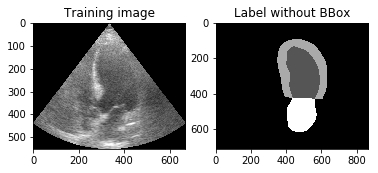

In [27]:
plt.subplot(1, 2, 1)
plt.imshow(img_arr_img[1])
plt.title('Training image')
plt.subplot(1,2,2)
plt.imshow(img_arr_ref[10])
plt.title('Label without BBox')
plt.show()

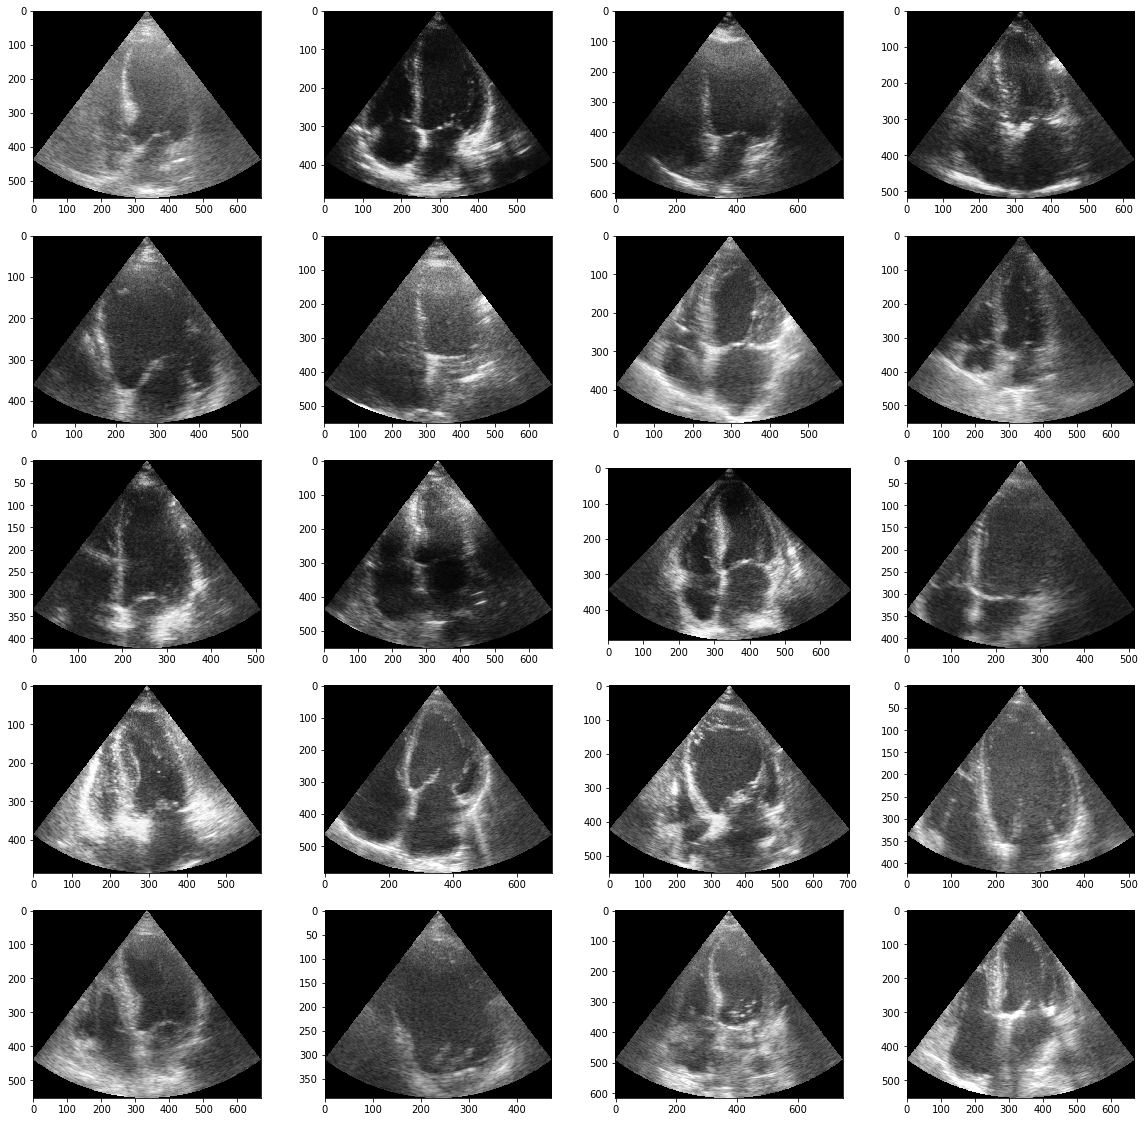

In [28]:
fig=plt.figure(figsize=(20, 20))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(img_arr_img[i])
plt.show()

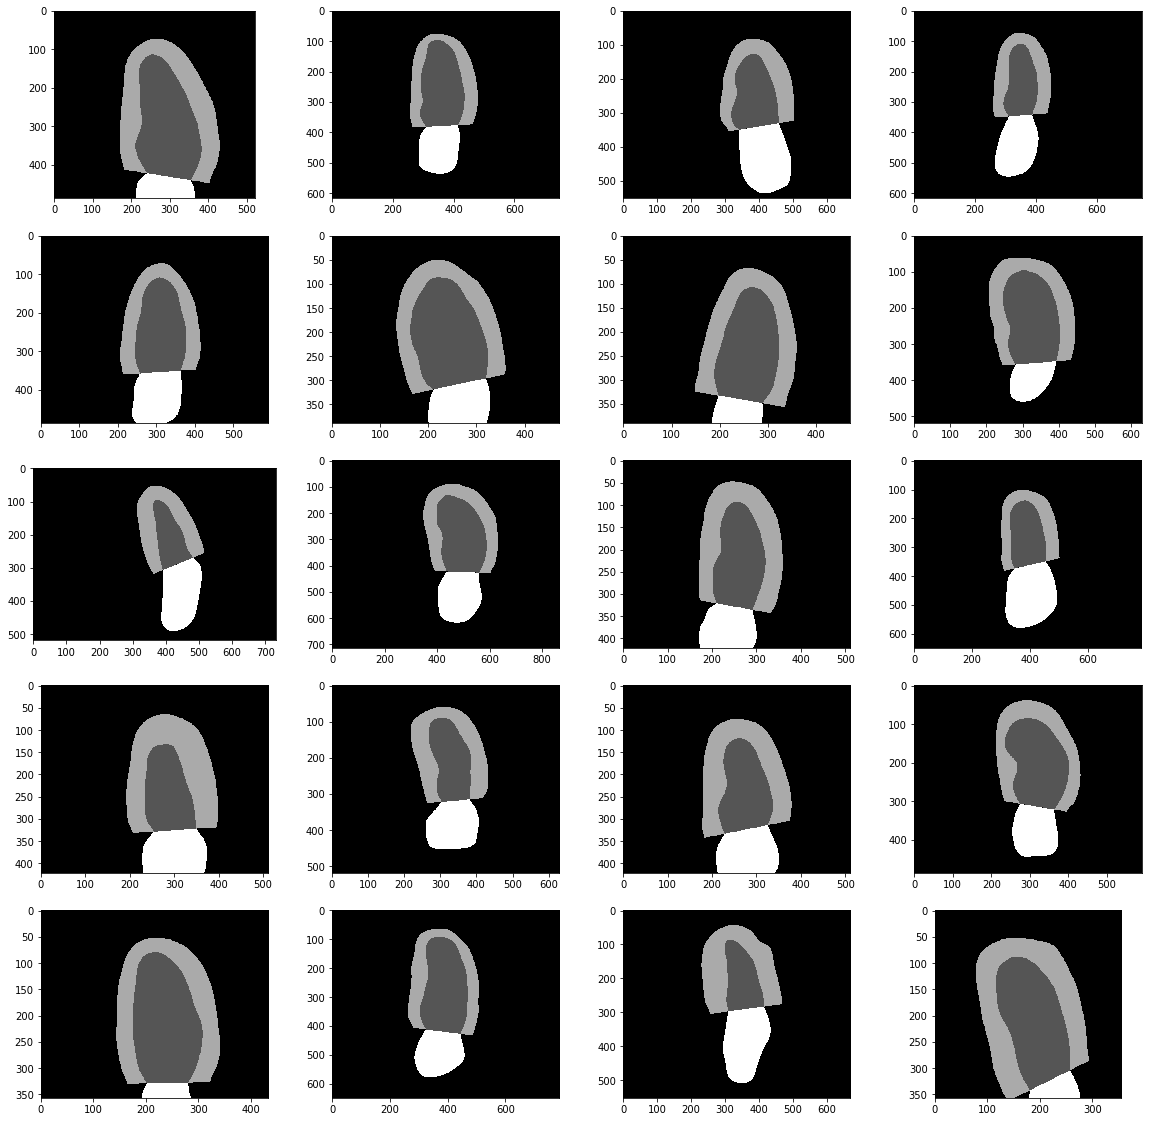

In [29]:
fig=plt.figure(figsize=(20, 20))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(img_arr_ref[i])
plt.show()

Pour trouver les 4 points extremes de chaque image, voir : https://www.pyimagesearch.com/2016/04/11/finding-extreme-points-in-contours-with-opencv/

In [30]:
im_test = img_arr_ref[10]
gray = cv2.cvtColor(im_test, cv2.COLOR_BGR2GRAY)
#cv2.contourArea(im_test)

In [31]:
cnts = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
c = max(cnts, key=cv2.contourArea)

In [32]:
# determine the most extreme points along the contour
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

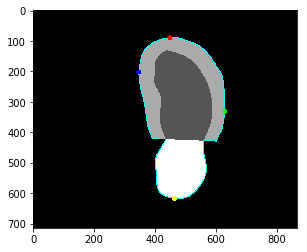

In [33]:
# draw the outline of the object, then draw each of the
# extreme points, where the left-most is red, right-most
# is green, top-most is blue, and bottom-most is teal
cv2.drawContours(im_test, [c], -1, (0, 255, 255), 2) #Contour en bleu cyan
#plt.imshow(im_test);
cv2.circle(im_test, extLeft, 8, (0, 0, 255), -1)
cv2.circle(im_test, extRight, 8, (0, 255, 0), -1)
cv2.circle(im_test, extTop, 8, (255, 0, 0), -1)
cv2.circle(im_test, extBot, 8, (255, 255, 0), -1)

# show the output image
plt.imshow(im_test)
#cv2.waitKey(0)

In [34]:
#w = extRight[0] - extLeft[0]
#h = extBot[1] - extTop[1]
#cv2.rectangle(im_test, )

In [35]:
Pt1 = (extLeft[0], extTop[1])
Pt2 = (extRight[0], extBot[1])

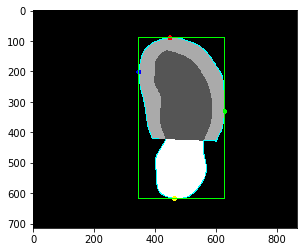

In [36]:
#cv2.circle(im_test, Pt1, 8, (0, 0, 255), -1)
#cv2.circle(im_test, Pt2, 8, (0, 255, 0), -1)
cv2.rectangle(im_test, Pt1, Pt2, (0,255,0), 2)
plt.imshow(im_test)

**Probleme : Le rectangle inclut aussi le ventricule droit (en blanc) :( **

In [37]:
im_test1 = img_arr_ref[10]
gray1 = cv2.cvtColor(im_test1, cv2.COLOR_BGR2GRAY)

contours = cv2.findContours(gray1.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if imutils.is_cv2() else contours[1]

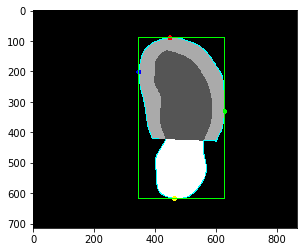

In [38]:
plt.imshow(im_test1)

In [39]:
#cv2.drawContours(im_test1, [contours], -1, (0, 255, 255), 2) #Contour en bleu cyan
im_test1[np.where((im_test1==255).all(axis=2))] = 0

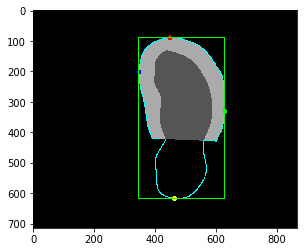

In [40]:
#len(im_test_no_white)
plt.imshow(im_test1)

Super, Ça marche ! On reprend depuis le début sans le ventricule droit cette fois-ci et sans dessiner les 4 points extrêmes et sans dessiner le contour:

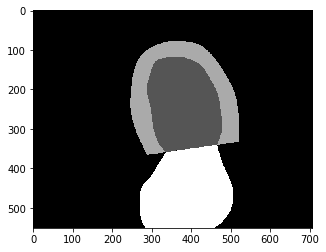

In [41]:
im_test = img_arr_ref[24]
plt.imshow(im_test)

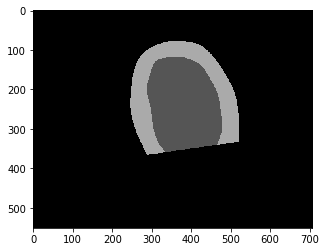

In [42]:
im_test[np.where((im_test==255).all(axis=2))] = 0 # On supprime le blanc ici
plt.imshow(im_test)

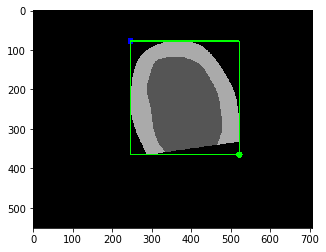

In [43]:
gray = cv2.cvtColor(im_test, cv2.COLOR_BGR2GRAY)
cnts = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
c = max(cnts, key=cv2.contourArea)

# determine the most extreme points along the contour
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

# draw the outline of the object, then draw each of the
# extreme points, where the left-most is red, right-most
# is green, top-most is blue, and bottom-most is teal

##Ligne suivante à commenter pour ne pas dessiner le contour
#cv2.drawContours(im_test, [c], -1, (0, 255, 255), 2) #Contour en bleu cyan

# 4 lignes suivantes à deśactiver pour créer la BBox sans les 4 points
#cv2.circle(im_test, extLeft, 8, (0, 0, 255), -1)
#cv2.circle(im_test, extRight, 8, (0, 255, 0), -1)
#cv2.circle(im_test, extTop, 8, (255, 0, 0), -1)
#cv2.circle(im_test, extBot, 8, (255, 255, 0), -1)

# show the output image
plt.imshow(im_test)

Pt1 = (extLeft[0], extTop[1])
Pt2 = (extRight[0], extBot[1])
# Now we show the 2 diagonal points defining the BBox
cv2.circle(im_test, Pt1, 8, (0, 0, 255), -1)
cv2.circle(im_test, Pt2, 8, (0, 255, 0), -1)

cv2.rectangle(im_test, Pt1, Pt2, (0,255,0), 2)
plt.imshow(im_test)

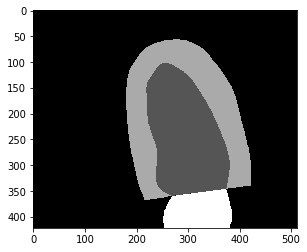

In [44]:
tt = img_arr_ref[22]
plt.imshow(tt)